In [43]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [44]:
def seed_read_results(env_name, files, keys, seeds):
    parent = "results_flatworld/" + env_name + "/"
    final_dfs = {}

    for seed in seeds:
        all_dfs = []
        for file in files:
            cur_name = parent + str(seed) + "/" + file + ".csv"
            cur_df = pd.read_csv(cur_name)
            cur_df.set_index(["Task Set", "Task ID"], inplace=True)
            
            if "Successes" in cur_df.columns:
                cur_df["Successes"] /= 50
    
            if "Avg Discounted Return" in cur_df.columns:
                cur_df.drop(columns=["Avg Discounted Return"], inplace=True)
    
            all_dfs.append(cur_df)
    
        df_concat = pd.concat(all_dfs, axis=1, keys=keys)
        final_dfs[seed] = df_concat

    df_mean = pd.concat(final_dfs.values()).groupby('Task ID').mean()

    # df_mean = sum(final_dfs.values()) / len(final_dfs)
    return final_dfs, df_mean

In [45]:
def plot_results(env, exp_list, labels, colors, seed_list=None):
    
    if seed_list is None:
        seed_list = [list(range(1, 6)) for _ in range(len(exp_list))]

    for i, (exp, seeds) in enumerate(zip(exp_list, seed_list)):
        dfs = [pd.read_csv(f"eval_results/{env}/{exp}/{i}.csv", header=0) for i in seeds]

        mean_df = pd.concat(dfs).groupby(level=0).mean()
        std_df = pd.concat(dfs).groupby(level=0).std()

        plt.plot(mean_df.index, mean_df["return"], label=labels[i], color=colors[i])  # Mean line
        plt.fill_between(mean_df.index,
                         mean_df["return"] - std_df["return"],
                         mean_df["return"] + std_df["return"],
                         color=colors[i], alpha=0.2)

    plt.xlabel("Number of Training Steps")
    plt.ylabel("ADR")
    plt.title("ADR over time +- one std")
    plt.legend(title="Models")
    plt.show()

In [46]:
with open('eval_datasets/FlatWorld-v0/finite_tasks.txt', 'r') as file:
    for line in file:
        print(line[:-1])

Reach Avoid General
RA_1 (F ((red & magenta) & F ((blue & green) & F yellow)))
RA_2 (F (orange & (!red U magenta)))
RA_3 ((!red U (green & blue & aqua)) & F (orange & (F (red  &magenta))))
RA_4 (((!yellow & !orange) U (green & blue)) & (!green U magenta))
RA_5 ((blue => F magenta) U (yellow | ((green & blue) & F orange))


In [47]:
env_name = 'FlatWorld-v0'

files = [env_name + '_deepsets_stay', env_name + '_gcn_update_2', env_name + '_deepsets_update']
keys = ['Deepsets', 'GCN (no pre)', 'Deepsets (formula)']
seeds = range(1, 6)

dfs, dfs_mean = seed_read_results(env_name, files, keys, seeds)

dfs_mean

Deepsets            GCN (no pre)            Deepsets (formula)  \
        Successes  Avg Steps    Successes  Avg Steps          Successes   
Task ID                                                                   
RA_1        0.932  70.746061        1.000  69.728000              1.000   
RA_2        0.640  47.114959        0.732  43.420523              1.000   
RA_3        0.928  62.308627        0.940  62.779130              0.984   
RA_4        0.828  38.668591        0.880  38.566432              0.900   
RA_5        0.940  32.445613        0.944  28.658889              0.996   

                    
         Avg Steps  
Task ID             
RA_1     69.788000  
RA_2     44.312000  
RA_3     62.372173  
RA_4     38.809598  
RA_5     30.701714

In [48]:
with open('eval_datasets/FlatWorld-v0/infinite_tasks.txt', 'r') as file:
    for line in file:
        print(line[:-1])

Reach Avoid Inifnite
RAI_1 ((G (F (blue & green))) & (G (F (red & magenta))))
RAI_2 ((G (F (aqua & blue))) & (G (F red)) & (G (F yellow)) & (G (!green)))
RAI_3 (F (G blue))
RAI_4 ((F (G blue)) & (F yellow & (F green)))
RAI_5 ((F (G magenta)) & (G (!yellow)))
RAI_6 (G ((green | yellow) => (F blue)) & (F (G (green | magenta)))


In [49]:
files_inf = [env_name + '_deepsets_stay_inf', env_name + '_gcn_update_2_inf', env_name + '_deepsets_update_inf']

dfs_inf, dfs_mean_inf = seed_read_results(env_name, files_inf, keys, seeds)

dfs_mean_inf


,Deepsets,GCN (no pre),Deepsets (formula)
,Accepting visits,Accepting visits,Accepting visits
Task ID,,,
RAI_1,12.192,12.164,12.156
RAI_2,3.212,2.608,2.300
RAI_3,483.872,480.020,481.920
RAI_4,441.268,441.080,449.364
RAI_5,408.948,441.500,331.408
RAI_6,31.772,98.824,48.556


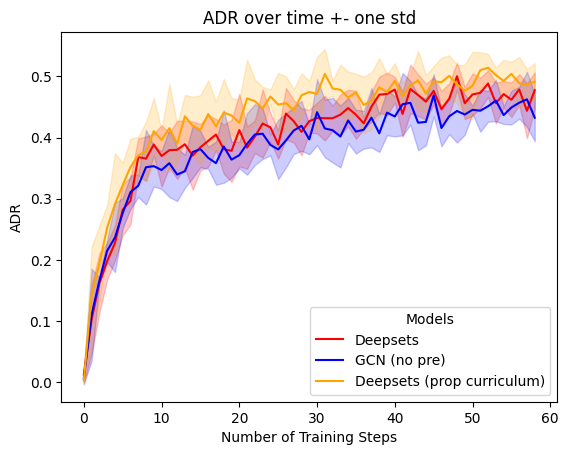

In [50]:
plot_results('FlatWorld-v0', ['deepsets_stay', 'gcn_update_2', 'deepsets_update'],
             ['Deepsets', 'GCN (no pre)', 'Deepsets (prop curriculum)'],
             ['red', 'blue', 'orange'])